[ 10.06  10.15   9.91   9.63   9.76   9.76   9.83   9.25   9.34   9.38
   9.5    9.56   9.23   9.63   9.89   9.63   9.76   9.27   9.18   9.13
   8.89   8.91   9.29   9.15   9.01   8.89   9.01   9.17   9.14   9.24
   9.17   9.05   9.15   9.79  10.12   9.97   9.76  10.06  10.34  10.36
  10.42  10.66  10.54  10.56  10.31  10.69  11.12  11.    11.04  11.08
  11.12  11.    10.88  11.1   10.79  11.15  11.06  10.99  10.57   9.69
   9.68   9.86   9.47   9.59   9.63   9.42   9.47   9.7    9.47   9.54
   8.79   8.5    8.75   8.62   8.88   9.18   9.     8.56   8.97   8.92
   8.71   8.9    9.2    8.85   8.83   8.95   8.84   8.49   8.42   8.41
   8.29   8.27   7.96   7.82   8.47   8.15   8.24   8.26   8.3    8.75]
[ 0.2  0.2  0.2  0.2  0.2]
[ 0.31002201  0.24144538  0.18803785  0.14644403  0.11405072]
[ -1.54828672e-16   7.72911233e-14  -1.50730384e-11   1.39225179e-09
  -4.94312198e-08  -1.41407546e-06   1.89122123e-04  -6.62482665e-03
   1.05773566e-01  -7.91122537e-01   1.17765096e+01]


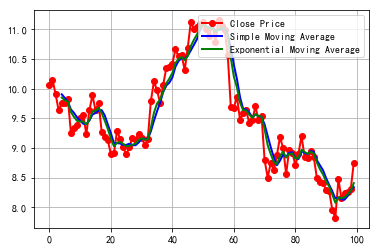

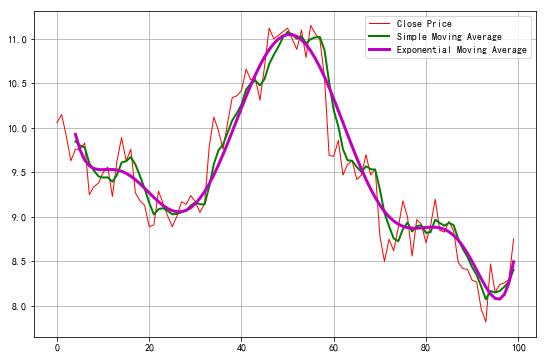

In [2]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


if __name__ == "__main__":
    stock_max, stock_min, stock_close, stock_amount = np.loadtxt('SH600000.txt', delimiter='\t', skiprows=2, usecols=(2, 3, 4, 5), unpack=True)
    N = 100
    stock_close = stock_close[:N]
    print stock_close

    n = 5
    weight = np.ones(n)
    weight /= weight.sum()
    print weight
    stock_sma = np.convolve(stock_close, weight, mode='valid')  # simple moving average

    weight = np.linspace(1, 0, n)
    weight = np.exp(weight)
    weight /= weight.sum()
    print weight
    stock_ema = np.convolve(stock_close, weight, mode='valid')  # exponential moving average

    t = np.arange(n-1, N)
    poly = np.polyfit(t, stock_ema, 10)
    print poly
    stock_ema_hat = np.polyval(poly, t)

    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.plot(np.arange(N), stock_close, 'ro-', linewidth=2, label=u'Close Price')
    t = np.arange(n-1, N)
    plt.plot(t, stock_sma, 'b-', linewidth=2, label=u'Simple Moving Average')
    plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'Exponential Moving Average')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(9, 6))
    plt.plot(np.arange(N), stock_close, 'r-', linewidth=1, label=u'Close Price')
    plt.plot(t, stock_ema, 'g-', linewidth=2, label=u'Simple Moving Average')
    plt.plot(t, stock_ema_hat, 'm-', linewidth=3, label=u'Exponential Moving Average')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()